<div>

</div>

# Lab 2: Classification of Remote Sensing Data in Japanese Forests. 

Author: David Smith 

Student Number: 21484971



## Introduction 

> Multi-temporal remote sensing data of a forested area in Japan. The goal is to map different forest types using spectral data.
> Data Set Information:
>
> This data set contains training and testing data from a remote sensing study which mapped different forest types based on their spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery. The output (forest type map) can be used to identify and/or quantify the ecosystem services (e.g. carbon storage, erosion protection) provided by the forest.
>
> **Attribute Information:**
> - `Class`: 's' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)
> - `b1 - b9`: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths for three dates (Sept. 26, 2010; March 19, 2011; May 08, 2011.
> - 1pred_minus_obs_S_b1` - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9).
> - `pred_minus_obs_H_b1` - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9). <sup><a href="#1" >1</a></sup>


## 0. Setup Environment

Importing standard libraries and setting up graphics themes and settings 

In [1]:
## Import Required Libraries
import os
import pandas as pd 
import numpy as np

## Import Graphics Libraries 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Setup Colour Scheme 
sns.set_palette("tab10")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="pastel",  rc=custom_params)

## Allows for multiple outputs from cells without having to repeatedly write display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Set the size of the plots 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # Note: 200 e.g. is really fine, but slower


## 1. Read in Contents of CSV Files 

Inspect what the columns are by displaying the first few lines of the
file. Use appropriate functions to display (visualise) the different features (or attributes / columns). Display
some plots for visualising the data. Describe what you see in your markdown cells

In [2]:
## function for importing data 
def load_data(file_name):
    csv_path = os.path.join(os.getcwd(), file_name)
    print(csv_path)
    return pd.read_csv(csv_path)

## import training and testing data 
forest_train = load_data("training.csv")
forest_test = load_data("testing.csv")

c:\Users\david\Dropbox\00 MyFiles\03 UWA\01 Master of Data Science\03 Semester 1\CITS5508 Machine Learning\02 Tutorials\Lab2\training.csv
c:\Users\david\Dropbox\00 MyFiles\03 UWA\01 Master of Data Science\03 Semester 1\CITS5508 Machine Learning\02 Tutorials\Lab2\testing.csv


### Review the Data & Structure 

The data has 28 variables and 325 & 198 observations in each in the training and testing set respectively. 

The structure shows a that the `class` variable is an object, all the `b` variables (b1-b9) are 64bit integers, and all the `pred` variables are 64bit floating point numbers. There are no null values in the data. 

In [3]:
## Review data shape 
print("Forest training data head: \n", forest_train.shape)
print("Forest testing data head: \n", forest_test.shape)

Forest training data head: 
 (325, 28)
Forest testing data head: 
 (198, 28)


In [4]:
## Review data head 
print("Forest training data head: \n", forest_train.head())
print("Forest testing data head: \n", forest_test.head())


Forest training data head: 
   class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0     d  67  51  68  115  69  111  136  31  67  ...                -9.17   
1     s  67  28  51   99  50   97   82  26  59  ...                -2.25   
2     s  63  26  50   95  49   91   81  26  57  ...                -0.44   
3     d  63  42  63   97  66  108  111  28  59  ...                -2.34   
4     s  46  27  50   83  51   90   76  26  56  ...                 1.25   

   pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0               -18.27                -1.80                -6.32   
1               -20.13                -2.11                -6.35   
2               -17.64                -1.81                -4.70   
3               -20.20                -1.89                -5.47   
4               -18.62                -2.17                -7.11   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -20.88               

In [5]:
## Review data structure 
print("Forest training data Structure: \n", forest_train.info())
print("Forest testing data info: \n", forest_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                325 non-null    object 
 1   b1                   325 non-null    int64  
 2   b2                   325 non-null    int64  
 3   b3                   325 non-null    int64  
 4   b4                   325 non-null    int64  
 5   b5                   325 non-null    int64  
 6   b6                   325 non-null    int64  
 7   b7                   325 non-null    int64  
 8   b8                   325 non-null    int64  
 9   b9                   325 non-null    int64  
 10  pred_minus_obs_H_b1  325 non-null    float64
 11  pred_minus_obs_H_b2  325 non-null    float64
 12  pred_minus_obs_H_b3  325 non-null    float64
 13  pred_minus_obs_H_b4  325 non-null    float64
 14  pred_minus_obs_H_b5  325 non-null    float64
 15  pred_minus_obs_H_b6  325 non-null    flo

### Review training and testing data structure 

As the data set has been already split into testing and training, it is important to review the proportion of each class to ensure there is a sufficient number of observations in each set. 

Here the testing set is quite large at approximately 38% of the total number of observations. It may have been better to reduce this proportion to give the training algorithms more data to work with, however for this assignment the training - test split will remain as is. 


Training Count:  325
Testing Count:  198


Text(0.5, 1.0, 'Balance of Training and Testing Data')

Text(0, 162.5, 'Training Count: 325 \n 62%')

Text(1, 99.0, 'Testing Count: 198 \n 38%')

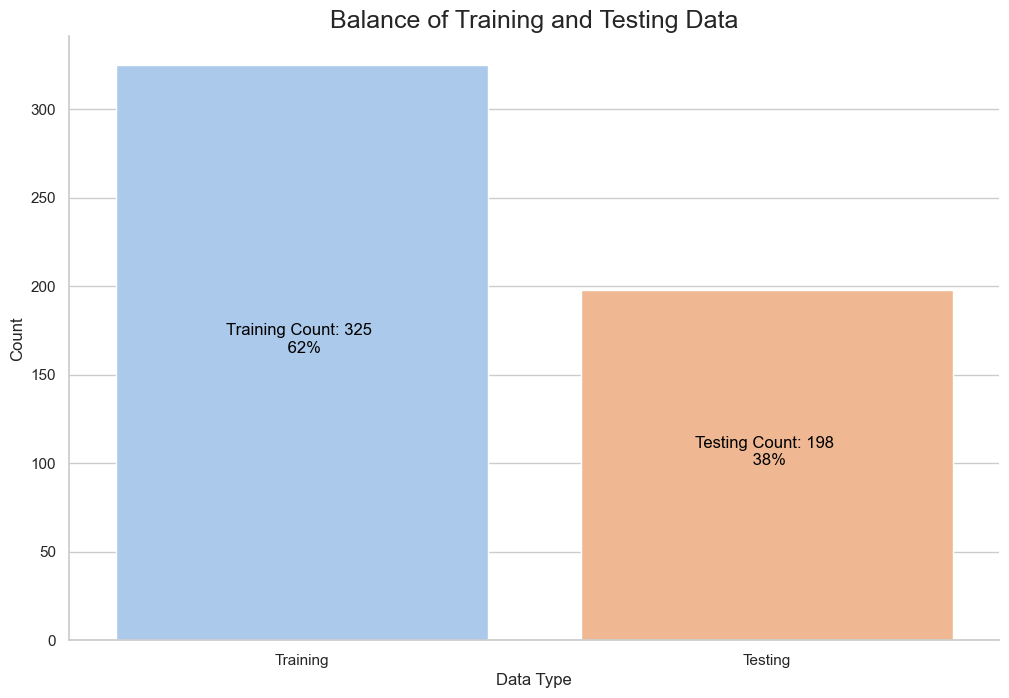

In [6]:
## Get number of observations
len_training = len(forest_train)
len_test = len(forest_test)

## Print Count of Observations
print("Training Count: ", len_training)
print("Testing Count: ", len_test)

## Convert to data frame
df = pd.DataFrame(
    {
        'Data Type': ["Training", 'Testing'],
        "Count": [len_training, len_test]
    }
)

## Plot of training testing split
g = sns.barplot(x="Data Type", y="Count", data=df)
g.set_title("Balance of Training and Testing Data", fontsize=18)

## Set up annotation text
training_string = "Training Count: {0} \n {1}".format(
    str(len_training),
    "{0:.0%}".format(len_training/(len_training + len_test))
)
testing_string = "Testing Count: {0} \n {1}".format(
    str(len_test),
    "{0:.0%}".format(len_test/(len_training + len_test))
)

## Add text to plot
g.text(
    0,
    len_training/2,
    training_string,
    fontdict=dict(color='black', fontsize=12),
    horizontalalignment='center'
)
g.text(
    1,
    len_test/2,
    testing_string,
    fontdict=dict(color='black', fontsize=12),
    horizontalalignment='center'
)


### Drop Columns 

Although this is a step required later on during this assignment, for the purpose of exploratory data analysis, the extra columns have been removed as to focus on the response variables used for modeling. 

The function below loops through the columns and removes anything that does not start with a B or is the response variable 'class'. 

To ensure the functions have worked correctly the head of the data is then displayed after. 

In [7]:
## Function to iterate and remove columns that do not start with B or class
def drop_columns(data): 
    dropped_cells = []
    for column in data:
        if not column.startswith("b") and column != "class":
            data.drop(columns=column, inplace=True)
            dropped_cells.append(column)
    print("Column Dropped:\n - {0}".format(  ", ".join(map(str, dropped_cells))))

## Drop Columns 
drop_columns(forest_train)
drop_columns(forest_test)

## Review output 
print("Training head: \n" , forest_train.head())
print("Testing head: \n" , forest_test.head())

Column Dropped:
 - pred_minus_obs_H_b1, pred_minus_obs_H_b2, pred_minus_obs_H_b3, pred_minus_obs_H_b4, pred_minus_obs_H_b5, pred_minus_obs_H_b6, pred_minus_obs_H_b7, pred_minus_obs_H_b8, pred_minus_obs_H_b9, pred_minus_obs_S_b1, pred_minus_obs_S_b2, pred_minus_obs_S_b3, pred_minus_obs_S_b4, pred_minus_obs_S_b5, pred_minus_obs_S_b6, pred_minus_obs_S_b7, pred_minus_obs_S_b8, pred_minus_obs_S_b9
Column Dropped:
 - pred_minus_obs_H_b1, pred_minus_obs_H_b2, pred_minus_obs_H_b3, pred_minus_obs_H_b4, pred_minus_obs_H_b5, pred_minus_obs_H_b6, pred_minus_obs_H_b7, pred_minus_obs_H_b8, pred_minus_obs_H_b9, pred_minus_obs_S_b1, pred_minus_obs_S_b2, pred_minus_obs_S_b3, pred_minus_obs_S_b4, pred_minus_obs_S_b5, pred_minus_obs_S_b6, pred_minus_obs_S_b7, pred_minus_obs_S_b8, pred_minus_obs_S_b9
Training head: 
   class  b1  b2  b3   b4  b5   b6   b7  b8  b9
0     d  67  51  68  115  69  111  136  31  67
1     s  67  28  51   99  50   97   82  26  59
2     s  63  26  50   95  49   91   81  26  57
3  

## Extract Features and Response Variables 

This function allows for the response variable to be set and the feature names to be extracted easily from the data set. Having these values stored in variables makes them easier to use, call, and update later on in the analysis. 

In [8]:
## Extract features and respond into variables 
forest_variables = []
forest_response = "class"

for column in forest_train:
    if(column != forest_response ):
       forest_variables.append(column)

## 2. Exploratory Data Analysis 


The key aspects that will be reviewed are: 
- Shape of the data
- Balance of the data and classes 
- Correlations 
- Outliers 

These aspects will be explored graphically and commented on as necessary. 

There are no missing data evident. 


### Review the Class Balance 

Although this is a question later in the assignment, this is an important step in the EDA process and as such it should remain in the context to better understand the data. 

In the plot below we see that the classes are not balanced which may cause issues in classification tasks. As such, stratified sampling may need to be used to ensure that samples are representative. With class 's' ('Sugi' forest) representing 42% of all data and class 'd'('Mixed deciduous' forest) representing 32%, and the 'o' ('Other' non-forest land) and 'h' ('Hinoki' forest) at 14% and 12% respectively, it might be useful to combine classes when modeling. This will depend however on what the goals of process are. However, given the data is mapping the spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery to identify and/or quantify the ecosystem services provided by each forrest type, this may not be appropriate. 

Text(0.5, 1.0, 'Number of Observations by Class')

Text(0, 68.0, 'Class: s\n Count:136\n42%')

Text(1, 52.5, 'Class: d\n Count:105\n32%')

Text(2, 23.0, 'Class: o\n Count:46\n14%')

Text(3, 19.0, 'Class: h\n Count:38\n12%')

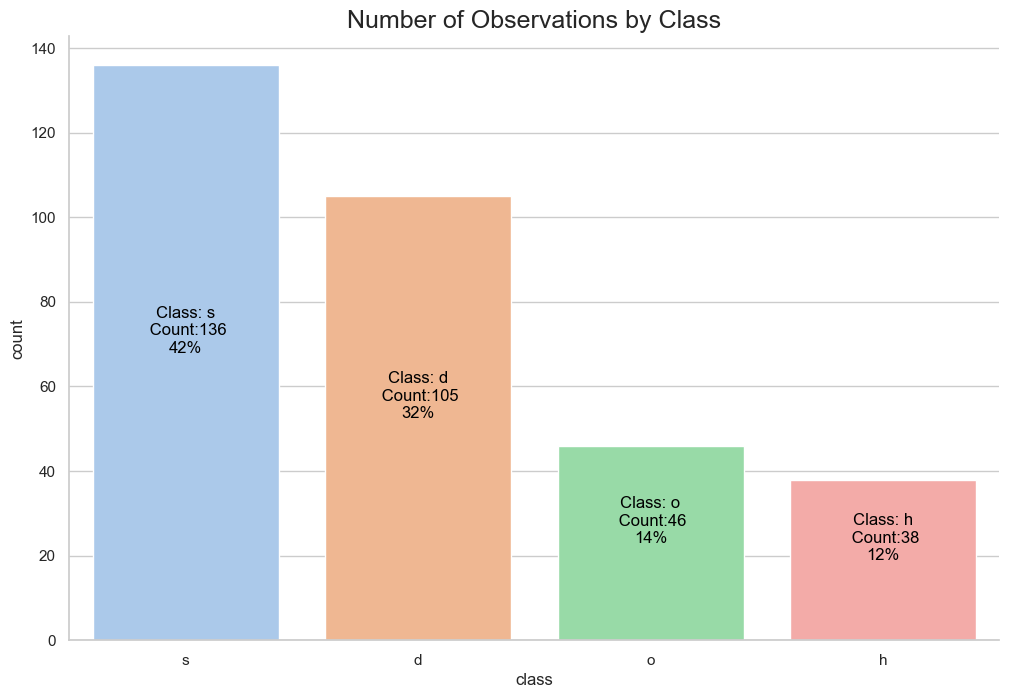

In [9]:
## Get number of observations 
class_counts = forest_train[forest_response].value_counts() 
class_names = forest_train[forest_response].value_counts().index

total_count = sum(forest_train[forest_response].value_counts())

## Set up annotation text 
labels = []

## Loop through class counts and create annotation text 
for id , class_count in enumerate(class_counts):
    label = "Class: {0}\n Count:{1}\n{2}".format( 
        class_names[id], 
        class_count, 
        "{0:.0%}".format(class_count / total_count) 
    )
    labels.append(
        label
    )

## Plot the frequency of the response variable 
bar = sns.countplot(data=forest_train, 
                    x=forest_response, 
                    order=forest_train[forest_response].value_counts().index 
                )
## Set the title 
bar.set_title("Number of Observations by Class" , fontsize=18)

## Add annotation to plot 
for i in range(len(forest_train[forest_response].value_counts())):
    value = forest_train[forest_response].value_counts()[i]
    bar.text(
        i,
        value/2, 
        labels[i], 
        fontdict=dict(
            color='black', 
            fontsize=12
            ), 
        horizontalalignment='center' )
    

### Review a Quick Summary Statistics 

Whilst printing the summary statists can be useful, there are quite a number of variables which makes it hard to quickly interpret the results. However, with the box plots we can see there are many different distributions within the variables with some non-normally distributed data. It seems in most cases that the data across variables tends to be positively skewed with most of the outliers represented there. 

There is variation around the means and distributions of the variables with 'b8'showing the lowest median with a lot of positive skew in the data and 'b6' with highest median. Variables 'b1' and 'b7' seem to be the most symmetrical and normally distributed with 'b4' being quite close too. However, the reset seem to all have significantly long positive tails. 

In [10]:
## Compute descriptive statistics 
forest_train.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000


### Check for Outliers & Data Shape



Text(0.5, 1.0, 'Boxplot of Each Variable Showing Distribution & Outliers')

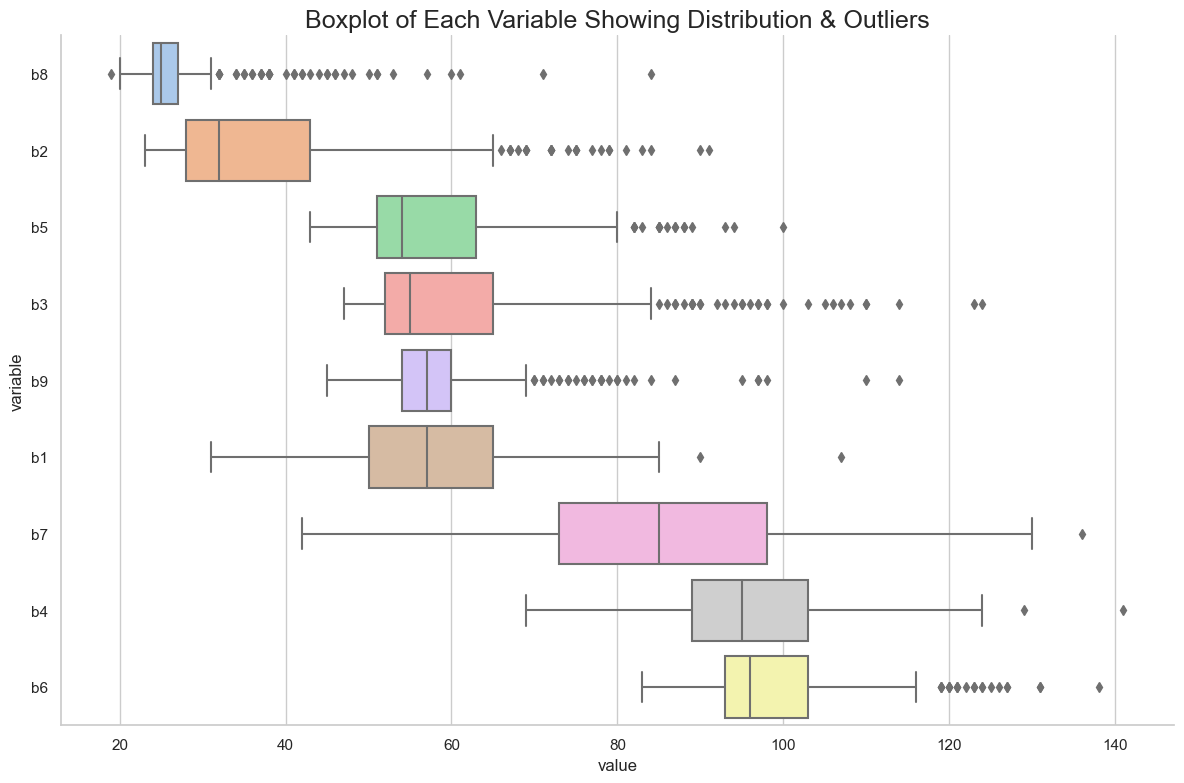

In [11]:
## Convert from "Wide" to "Long" format 
data_long = forest_train[forest_variables].melt()

## Order the data by median value 
my_order = data_long.groupby(by=["variable"])["value"].median().sort_values(ascending=False).iloc[::-1].index

## Plot the each variable 
g = sns.boxplot(
    data=data_long, 
    x="value", 
    y="variable", 
    orient="h", 
    order=my_order
)
g.set_title("Boxplot of Each Variable Showing Distribution & Outliers" , fontsize=18)
plt.tight_layout()
plt.show()


### Review the Distribution of Variables 

The observations of the box plots are further confirmed when reviewing the histograms. The majority of the data has a positive skew.

Given the distributions of the data, it may be required for some model tasks that the data is transformed. The code for the log transform is given below however is commented out. 

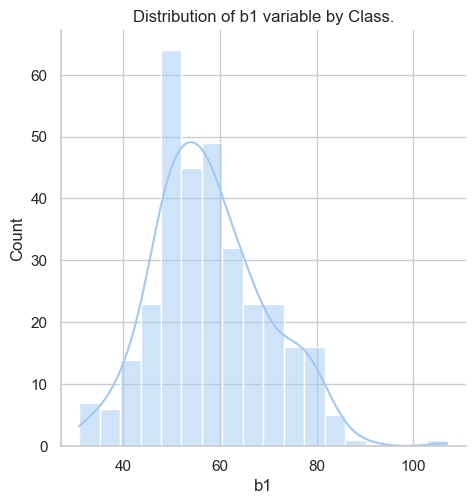

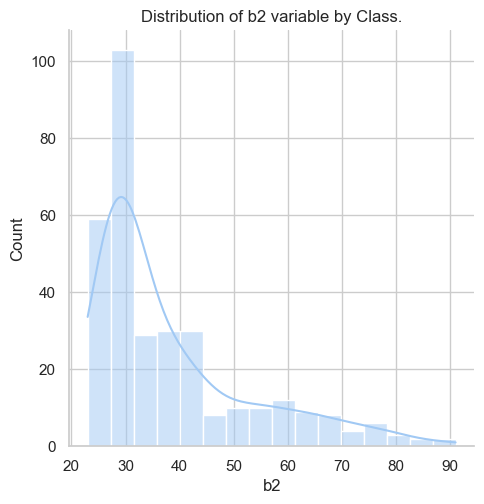

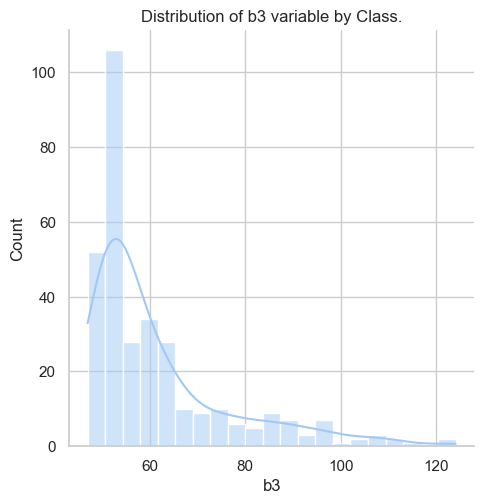

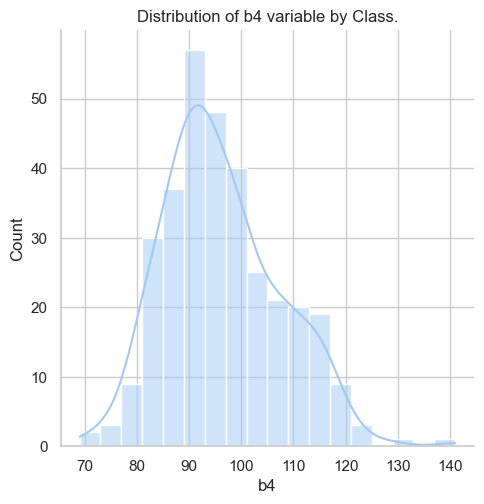

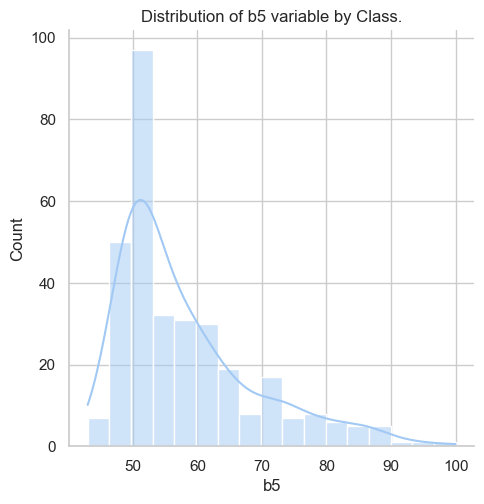

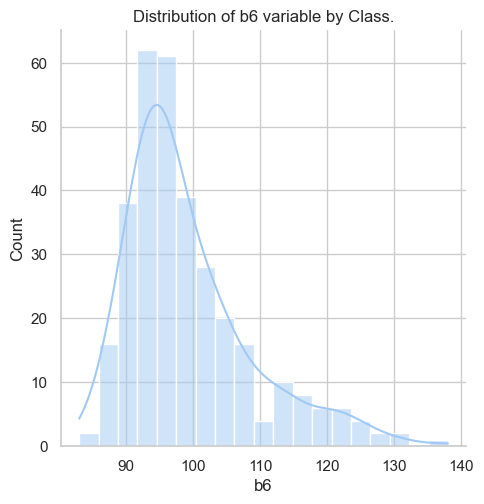

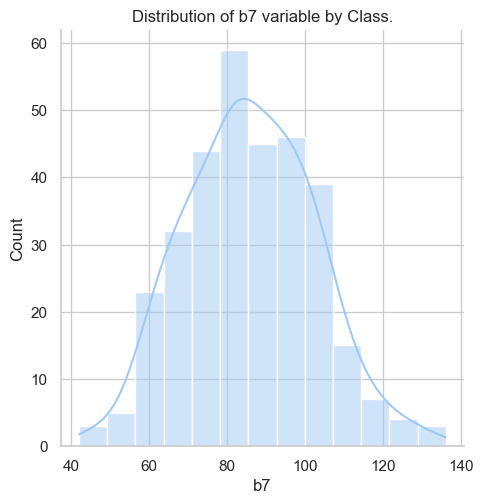

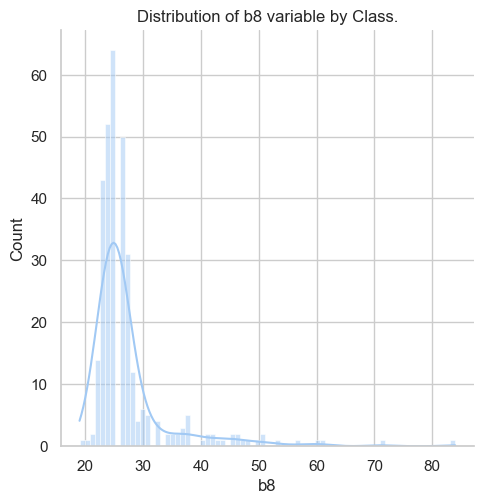

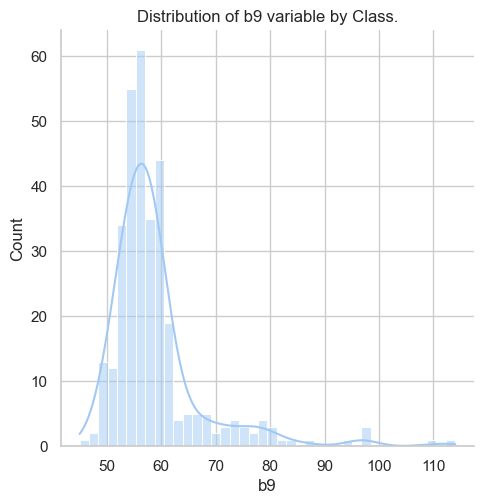

In [12]:
from numpy import log

## Maybe try running a log transfrom on the skew data? 
#log_trained_response = log(forest_train[forest_variables])

## Plot the Distribution of each variable
for column in forest_train[forest_variables]:
        sns.displot(forest_train, x=column, kde=True)\
        .set( title="Distribution of {0} variable by Class.".format(column))


### Distribution by Class 

Here we are looking to see within each variable, how are the different classes distributed. 

In the plots below, we can quite large differences in the distribution of variables across the different classes. 

As probably expected, the 'o' ('Other' non-forest land) class has a much flatter distribution as it, given the type of variable, would be likely to have many different types of classes combined into this one variable. Further searching into the specific class classification may be required to confirm this. 

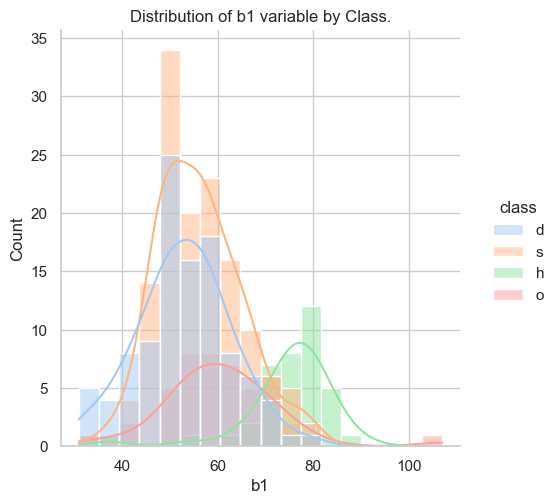

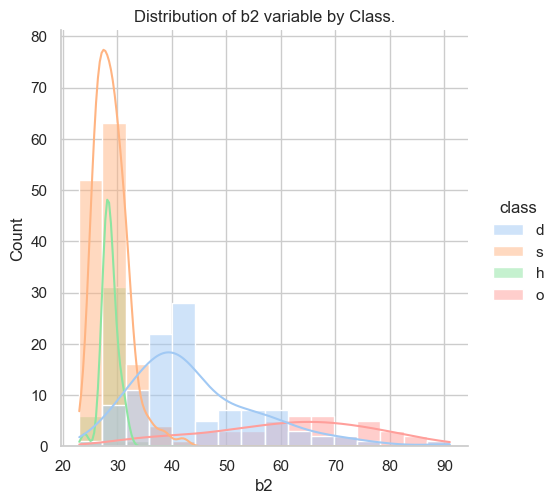

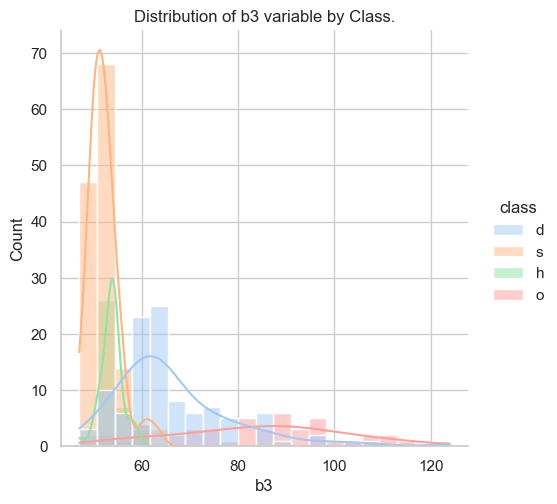

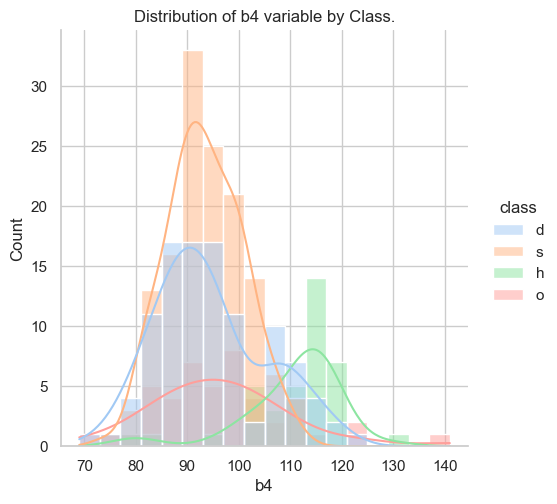

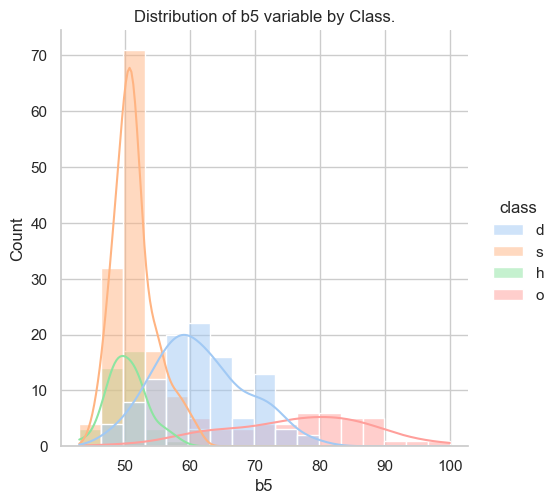

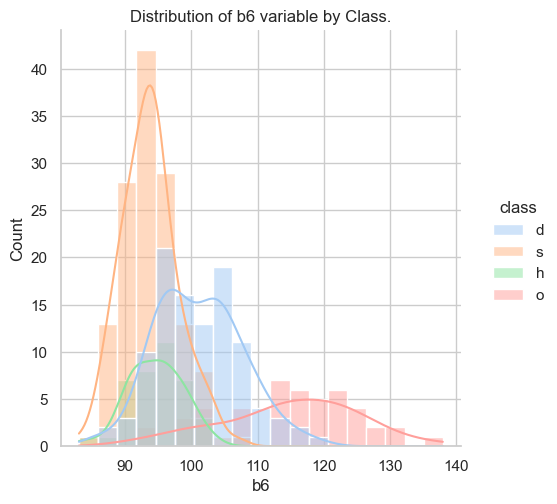

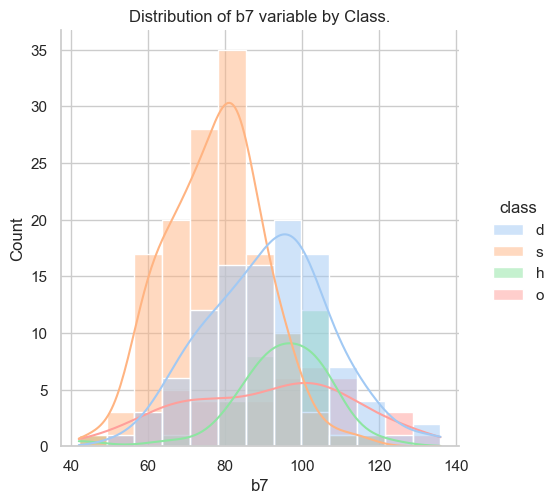

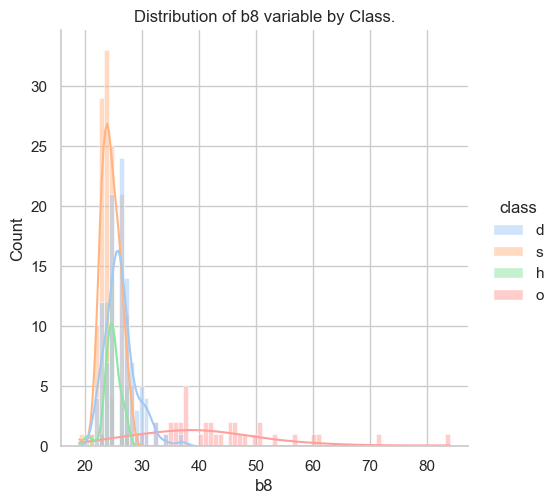

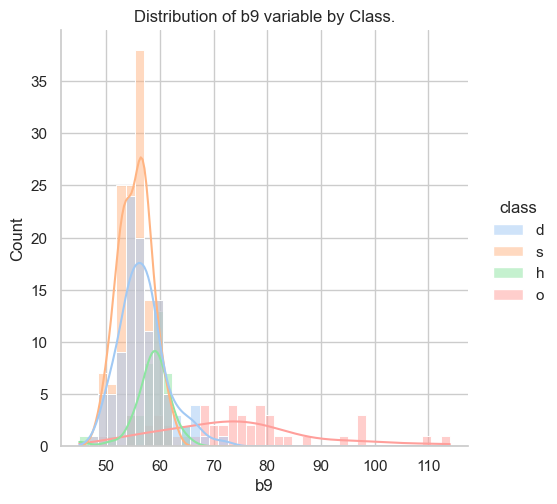

In [13]:
## Plot the distribution of each variable by Class
for column in forest_train[forest_variables]:
    sns.displot(forest_train, x=column, hue=forest_response,  kde=True ) \
    .set( title="Distribution of {0} variable by Class.".format(column))

### Review Correlations Between Variables 

Looking at the correlation matrix there are some variables with strong positive linear correlations. 
Variables b3 & b2 have the highest correlation value of 0.97, followed by b8 & b9 at 0.95, and then b5 & b6. 

There are many variables with strong or reasonably strong correlations, this is important to note as some models, such as regression, may run into issues with multicollinearity. Therefore it is important to check the model's assumptions before running. 

The pairs plot below shows how these data points are correlated and work well in conjunction with he confusion matrix. However, given that there are many data points it can be difficult to assess and therefore should be used with the correlation matrix to explore specific questions with regards to the correlations.

In some of the scatter plots there seems to be a divergence between classes. This may not be picked up in the correlation matrix as the different linear distributions of points are conflicting with each other. These variables will be useful and show areas of separation between classes. 

Text(0.5, 1.0, 'Correlation Matrix Heat Map')

Text(257.25000000000017, 0.5, 'Variables')

Text(0.5, 67.25, 'Variables')

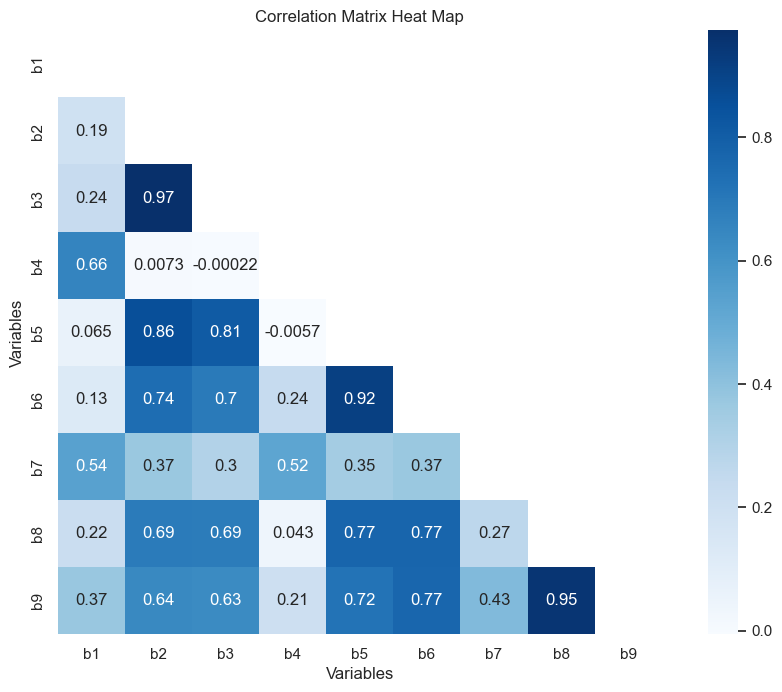

In [14]:
# Plot Correlation Matrix 
## Calculate correlation between each pair of variable
corr_matrix=forest_train.corr() 

# print(corr_matrix) ## No need to print as it is on the plot 

## Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

## Draw the heatmap with the mask
plot = sns.heatmap(corr_matrix, 
    mask=mask, 
    square=True, 
    annot=True, 
    cmap="Blues"
)

## Add titles and labels 
plot.set_title("Correlation Matrix Heat Map")
plot.set_ylabel("Variables")
plot.set_xlabel("Variables")

Text(0.5, 1.01, 'Pairwise Plot of Variables Coloured by Class')

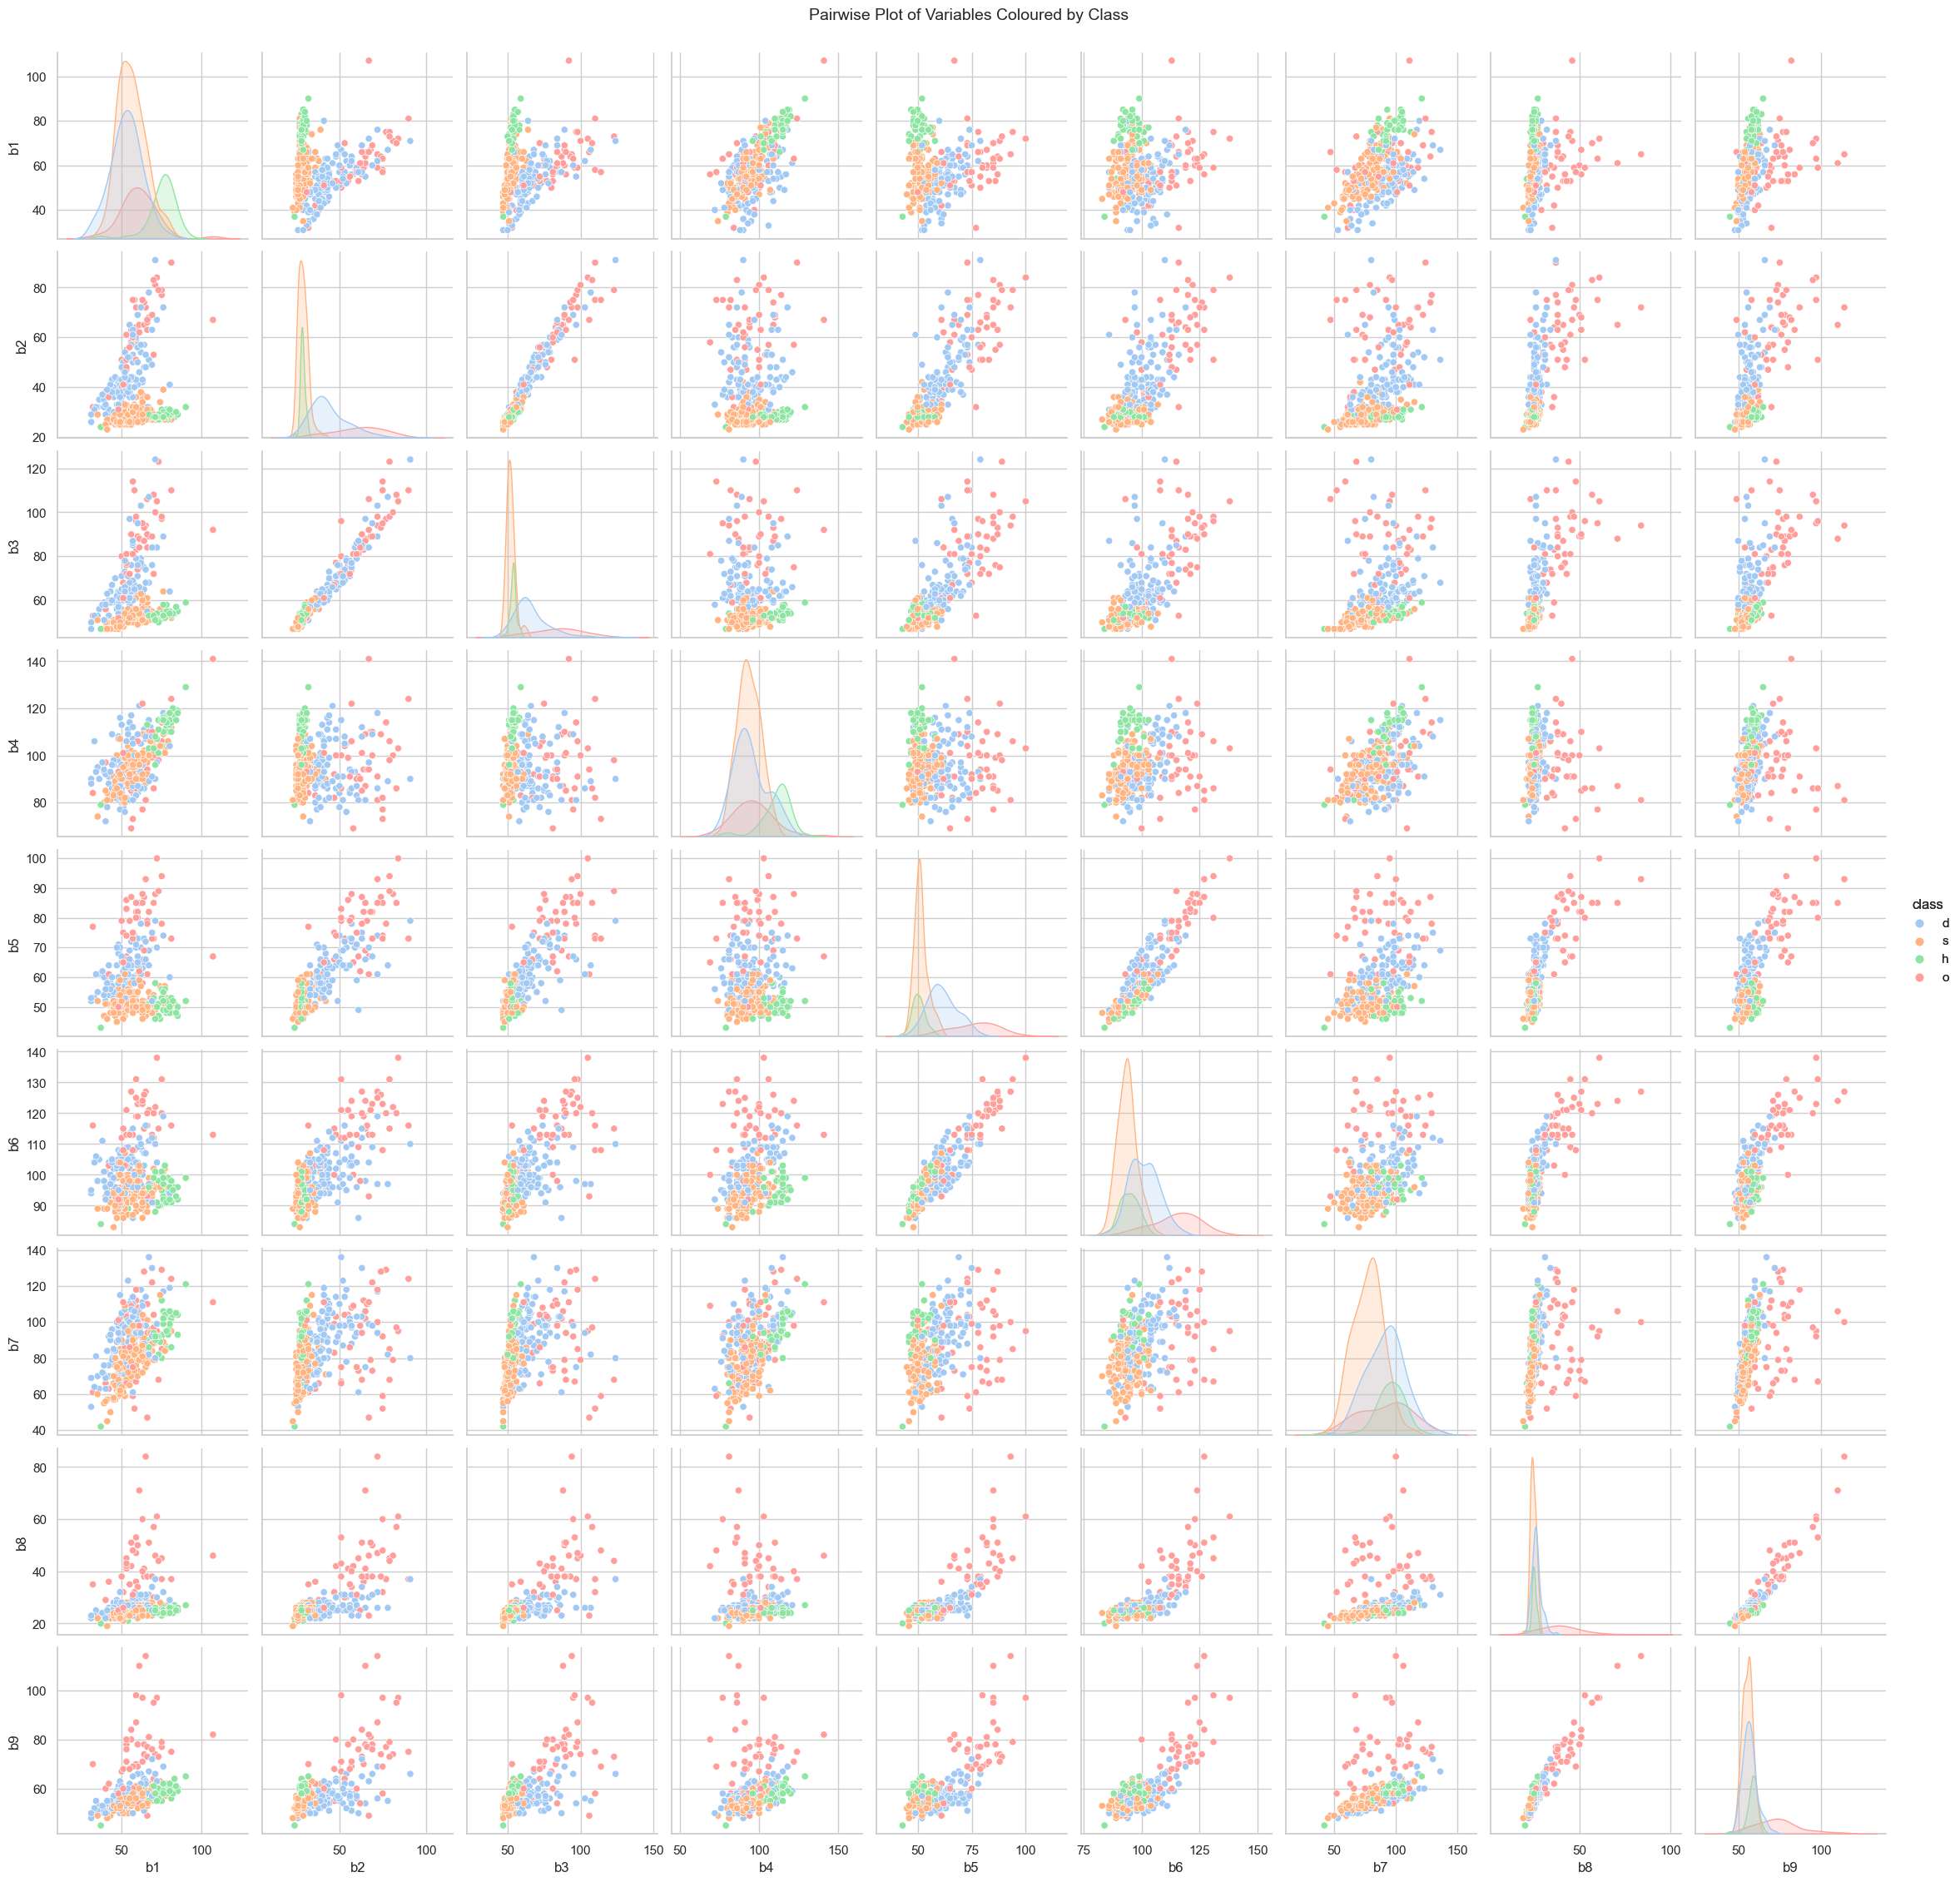

In [15]:
## Create a Pairwise scatter plot to look for correlations 
g = sns.pairplot(forest_train, hue=forest_response, height=2.5)
g.add_legend()
g.fig.suptitle("Pairwise Plot of Variables Coloured by Class" ,  y=1.01 , fontsize=14)

## 2. To simplify the classification task, write Python code to remove all the columns whose names begin with pred minus obs. 

You should have only 9 features (b1, b2, · · · , b9) left for both the training and test sets.

### Drop Columns 

NOTE: This function was implemented earlier to ensure that the EDA process was exploring the data that is going to be used in the modeling phase as training data. The code has been duplicated here for ease of marking. 

In [16]:
## Function to iterate and remove columns that do not start with B or class
def drop_columns(data): 
    dropped_cells = []
    for column in data:
        if not column.startswith("b") and column != "class":
            data.drop(columns=column, inplace=True)
            dropped_cells.append(column)
    print("Column Dropped:\n - {0}".format(  ", ".join(map(str, dropped_cells))))

# ## Drop Columns 
# drop_columns(forest_train)
# drop_columns(forest_test)

# ## Review output 
# forest_train.head()
# forest_test.head()

## 3. Write Python code to count the number of instances for each class label. 
>Do you have an imbalanced training set?

In the plot below we see that the classes are not balanced which may cause issues in classification tasks. As such, stratified sampling may need to be used to ensure that samples are representative. With class 's' ('Sugi' forest) representing 42% of all data and class 'd'('Mixed deciduous' forest) representing 32%, and the 'o' ('Other' non-forest land) and 'h' ('Hinoki' forest) at 14% and 12% respectively, it might be useful to combine classes when modeling. This will depend however on what the goals of process are. However, given the data is mapping the spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery to identify and/or quantify the ecosystem services provided by each forrest type, this may not be appropriate. 

In [17]:
## Count the number of Observations by Class
forest_train[forest_response].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

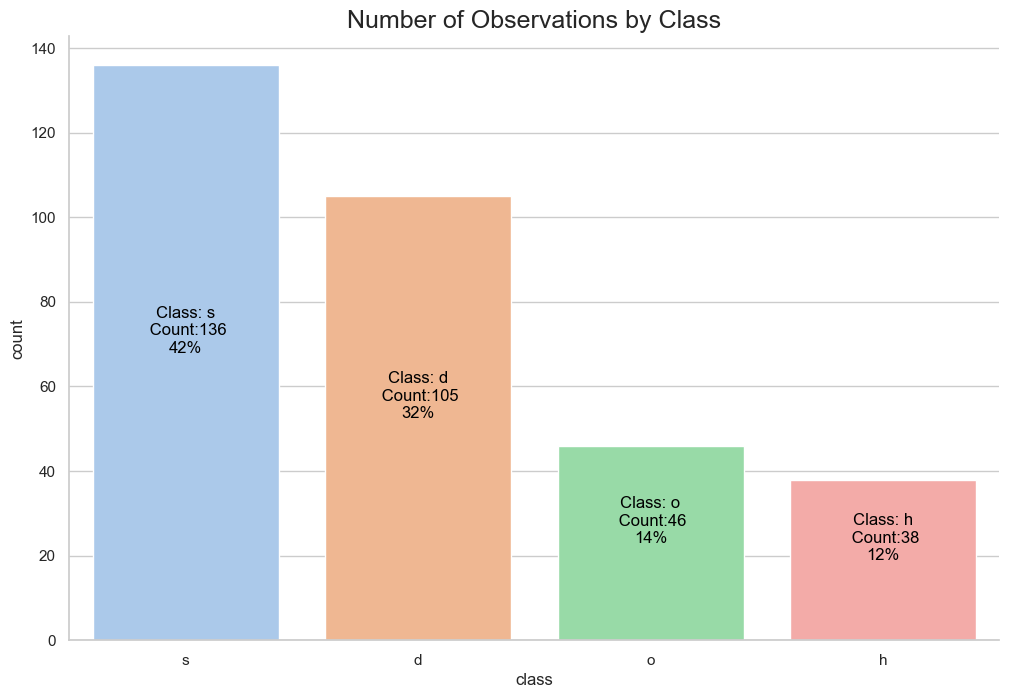

In [18]:
## Reusable function for plotting class balance within a dataset. 
## This has been duplicated here from before for ease of marking.
## It has be converted to a function so the snippet can be used later. 
def plot_balance(data , response_class):
    ## Get number of observations 
    class_counts = data[response_class].value_counts() 
    class_names = data[response_class].value_counts().index
    total_count = sum(forest_train[response_class].value_counts())

    ## Set up annotation text 
    labels = []

    ## Loop through class counts and create annotation text 
    for id , class_count in enumerate(class_counts):
        label = "Class: {0}\n Count:{1}\n{2}".format( 
            class_names[id], 
            class_count, 
            "{0:.0%}".format(class_count / total_count) 
        )
        labels.append(
            label
        )

    ## Plot the frequency of the response variable 
    bar = sns.countplot(data=data, 
                        x=response_class, 
                        order=data[response_class].value_counts().index 
                    )
    ## Set the title 
    bar.set_title("Number of Observations by Class" , fontsize=18)

    ## Add annotation to plot 
    for i in range(len(data[forest_response].value_counts())):
        value = data[response_class].value_counts()[i]
        bar.text(
            i,
            value/2, 
            labels[i], 
            fontdict=dict(
                color='black', 
                fontsize=12
                ), 
            horizontalalignment='center' )

plot_balance(forest_train,forest_response)

## 4. Perform an appropriate feature scaling step before doing the classification. 
> *You can use MinMaxScaler, StandardardScaler, or any suitable scaling function in the sklearn.preprocessing package. You can also write your own feature scaling code if you prefer.*
> *Whichever way, ensure that your feature scaling is applied to both the training data and the test data.*

A very important consideration when using support vector machines, is the scale between variables. Without scaling the variables to a normalized value, the algorithm struggles to fit to the data. Here the standard scaler has been used as it is used widely in industry and gives consistent results. 

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Create pipline 
trans_pipeline = Pipeline([
    ("scale_values" , StandardScaler())
])

## Apply to training data 
X_train_scaled = trans_pipeline.fit_transform(forest_train[forest_variables])
Y_train = forest_train[forest_response]

## Review Outcome 
print("Transformed Training Set: ")
X_train_scaled

## Apply to testing data 
X_test_scaled = trans_pipeline.fit_transform(forest_test[forest_variables])
Y_test = forest_test[forest_response]

## Review Outcome 
print("Transformed Testing Set: ")
X_test_scaled


Transformed Training Set: 


array([[ 0.76823994,  0.86623295,  0.43606029, ...,  3.01708854,
         0.48758236,  0.91533208],
       [ 0.76823994, -0.71267251, -0.69876454, ..., -0.23256801,
        -0.1850164 ,  0.01352708],
       [ 0.42598088, -0.84996863, -0.76551894, ..., -0.29274684,
        -0.1850164 , -0.21192418],
       ...,
       [-0.7719258 , -0.84996863, -0.89902774, ..., -1.43614451,
        -0.72309541, -0.66282668],
       [-0.25853722, -0.84996863, -0.63201013, ..., -1.25560804,
        -0.58857565, -0.3246498 ],
       [ 1.11049899, -0.71267251, -0.69876454, ...,  0.36922024,
        -0.31953615, -0.09919855]])

Transformed Testing Set: 


array([[-1.8787969 , -0.28223274, -0.3865936 , ...,  0.15428138,
        -0.18893459, -0.11433257],
       [ 1.6513761 , -0.61954914, -0.3865936 , ...,  0.08997041,
        -0.3006034 ,  0.09053484],
       [-0.78052085, -0.90064614, -0.84980409, ..., -0.4245174 ,
        -0.3006034 , -0.31919997],
       ...,
       [ 1.25913466, -0.61954914, -0.50239623, ...,  1.18325699,
        -0.4122722 , -0.21676627],
       [ 0.47465177, -0.78820734, -0.61819885, ..., -0.23158447,
        -0.523941  , -0.62650107],
       [ 1.33758295, -0.67576854, -0.50239623, ...,  0.73308016,
        -0.4122722 , -0.21676627]])

## 5. Use the Support Vector Machine Classifier implemented in the sklearn.svm.SVC class to perform multiclass classification using the one-versus-one strategy. 

> *You should look at the Scikit-learn API for this class and experiment with two hyperparameters. You should use grid search and 3-fold cross validation to find the optimal values for these two hyperparameters that maximise the classification accuracy.*
>
> *For other hyperparameters, you can manually set them to some reasonable values. Apart from the Python code, you should explain what you carried out in markdown cells, e.g., which two hyperparameters you have tried? what combination of the hyperparameter values gave the highest classification accuracy?*


#### What are Support Vector Machines 

Support Vector Machine (SVM) is a machine learning model that is capable of both linear and non-linear classification, regression, and outlier detection. 

It is a model that works best on complex small or medium sized datasets. 


>The **advantages** of support vector machines are:
>- Effective in high dimensional spaces.  
>- Still effective in cases where number of dimensions is greater than the number of samples.  
>- Uses a subset of training points in the decision function (called support vectors), so it is >also memory efficient.  
>- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
>
>The **disadvantages** of support vector machines include:  
>- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.  
>- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below). <sup><a href="#2" >2</a></sup>

#### Implementation 

For classification task there are two ways of running the algorithm - one vs one, and one vs rest. For this question the former will be implemented. There are two ways of implementing this in Sklearn as seen below. In this case the second implementation will be used as its seems to be cleaner to read. 
```
# Set process In Using Function 
from sklearn.multiclass import OneVsRestClassifier, OneVsOne

ovo_clf = OneVsRestClassifier(SVC(...))
ovr_clf = OneVsRestClassifier(SVC(...))

## OR...

# Set process In SVC Constructor
ovo_clf = SVC( decision_function_shape='ovo'  , ...)
ovr_clf = SVC( decision_function_shape='ovr'  , ...)

```

#### Hyperparameters Used & Considered 

There are many hyperparameters that can be tuned when fitting a support vector machine. The variables following have been fit using a cross validation grid search, the explanation of each has been taken from the documentation. 


>Cfloat, default=1.0
>- Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
>
>kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
>- Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
>
>degreeint, default=3
>- Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
>
>gamma{‘scale’, ‘auto’} or float, default=’scale’
>Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
>- if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
>- if ‘auto’, uses 1 / n_features.
>
>decision_function_shape{‘ovo’, ‘ovr’}, default=’ovr’  
>- Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy. The parameter is ignored for binary classification. <sup><a href="#3" >3</a></sup>

#### Grid Search 
A grid search is an exhaustive search over a set of specified parameter values for estimators. 
This has been implemented using the cross fold validation that allows for the data to be partitioned into testing and training chunks to evaluate the performance of each parameter pairing by a given scoring function. 

A grid search has been asked for by the question, however a Stratified K-fold grid search might be more appropriate here due to the imbalance in the class labels. This would ensure that each fold is representative. 


#### Process & Outcomes 

Best Hyperparameter Combinations: 
- 'C': 1
- 'gamma': 0.1
- 'kernel': 'rbf'

The best model has an accuracy of 91% when applied to the training set. The full classifications report is shown below. This looks good however the polynomial model does have a tendency to over fit to the training data. This will be further explored in the model evaluation set. Model evaluation on the testing set is not run here as it could bias the way other models are explored.  

Training Classification Report: 
```
               precision    recall  f1-score   support

           d       0.92      0.92      0.92       105
           h       0.86      0.79      0.82        38
           o       0.97      0.83      0.89        46
           s       0.89      0.96      0.92       136

    accuracy                           0.91       325
   macro avg       0.91      0.87      0.89       325
weighted avg       0.91      0.91      0.91       325

```

### Support Vector Machine 

Running the support vector machine using a random grid search with 3 fold cross validation. 

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Set up model 
svm_clf = SVC(
  decision_function_shape="ovo"
  )

## View hyperparameter 
svm_clf.get_params().keys()

## Set up parameter grid 
param_grid = [
  {'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['linear']},
  {'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
 ]
 
 ## Establish the grid search 
svm_grid_search = GridSearchCV( 
    svm_clf,
    param_grid, 
    cv=3, 
    verbose=3,
    scoring="accuracy"
)

## Fit the data to the grid search 
svm_grid_search.fit(X_train_scaled, Y_train)


dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END ....C=0.01, gamma=1, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/3] END ....C=0.01, gamma=1, kernel=linear;, score=0.769 total time=   0.0s
[CV 3/3] END ....C=0.01, gamma=1, kernel=linear;, score=0.713 total time=   0.0s
[CV 1/3] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/3] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.769 total time=   0.0s
[CV 3/3] END ..C=0.01, gamma=0.1, kernel=linear;, score=0.713 total time=   0.0s
[CV 1/3] END .C=0.01, gamma=0.01, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/3] END .C=0.01, gamma=0.01, kernel=linear;, score=0.769 total time=   0.0s
[CV 3/3] END .C=0.01, gamma=0.01, kernel=linear;, score=0.713 total time=   0.0s
[CV 1/3] END C=0.01, gamma=0.001, kernel=linear;, score=0.789 total time=   0.0s
[CV 2/3] END C=0.01, gamma=0.001, kernel=linear;, score=0.769 total time=   0.0s
[CV 3/3] END C=0.01, gamma=0.001, kernel=linear;

GridSearchCV(cv=3, estimator=SVC(decision_function_shape='ovo'),
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=3)

### Hyperparameter Review & Best Model Extraction

Best Hyperparameter Combinations: 
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 

Top Parameter Combinations: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
21,0.002334,0.000474,0.001665,0.000472,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.853211,0.925926,0.888889,0.889342,0.029687,1
11,0.001983,0.000012,0.001006,0.000022,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.880734,0.888889,0.888889,0.886171,0.003844,2
8,0.002001,0.000027,0.001010,0.000016,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.880734,0.888889,0.888889,0.886171,0.003844,2
9,0.001988,0.000016,0.001012,0.000016,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.880734,0.888889,0.888889,0.886171,0.003844,2
10,0.002003,0.000006,0.000665,0.000470,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.880734,0.888889,0.888889,0.886171,0.003844,2


Text(0.5, 0.98, 'Mean Test Score for Hyperparameter Value by Kernel Type')

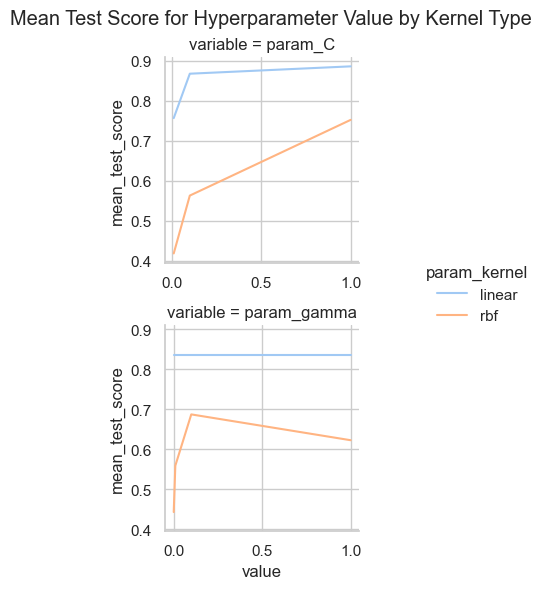

In [21]:
## Print best Parameters 
print("Best Hyperparameter Combinations: \n" , svm_grid_search.best_params_ , "\n")

## Convert grid results to a data frame 
df = pd.DataFrame(svm_grid_search.cv_results_)

## Print the top ranking combinations 
print("Top Parameter Combinations: ")
df.sort_values(by=['rank_test_score']).head()

## Convert data frame to long format for graphics 
vars = ["param_C", "param_gamma", "mean_test_score", "param_kernel"]
df_long = df[vars].melt(id_vars=["param_kernel", "mean_test_score"])

## Create line plot for the variables 
g = sns.FacetGrid(df_long, row='variable', hue='param_kernel', sharex=False )
g = g.map(sns.lineplot, 'value', 'mean_test_score', ci=None).add_legend()

## Add title to the plot
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Mean Test Score for Hyperparameter Value by Kernel Type')


#### Confusion Matrix Plot Function

This function has been set up to make it easier to visualize the output of the confusion matrix function. It allows for the quick understanding of where the classification model is making mistakes in a more intuitive manner than the standard matrix in the console output. 

In [22]:
from sklearn.metrics import confusion_matrix 

## Function that creates a confusion matrix plot 
def create_confusion_plot(conf_mx , name =""):
  ## Format the value from matrix
  group_counts = ["{0:0.0f}".format(value) for value in
                  conf_mx .flatten()]
                  
  ## Get the percentage of represented in each cell
  group_percentages = ["{0:.2%}".format(value) for value in
                      conf_mx .flatten()/np.sum(conf_mx )]
  ## Create Text Labels 
  labels = [f"{v1}\n{v2}" for v1, v2 in
            zip(group_counts,group_percentages)]

  ## Reshape the array into a data frame 
  n_classes = len(Y_test.unique())
  labels = np.asarray(labels).reshape(n_classes , n_classes)

  ## Create colour palette
  cmap = 'Blues'

  ## Create new plot
  plt.figure() 
  ## Create heatmap
  res = sns.heatmap(conf_mx , annot=labels ,fmt='',  vmin=0.0, vmax=100.0,  cmap=cmap)

  # labels, title and ticks
  res.set_xlabel('Predicted labels')
  res.set_ylabel('True labels')
  res.set_title(name + " Class Confusion Matrix", fontsize=18)
  res.xaxis.set_ticklabels(Y_test.unique())
  res.yaxis.set_ticklabels(Y_test.unique())
  plt.plot()


#### Model Evaluation Function

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, f1_score

## Function to quickly create model evaluations 
def model_eval(model_grid , x_data , y_data, name=""):
    ## Create Prediction from testing data 
    y_pred = model_grid.best_estimator_.predict(x_data)

    ## Calculate individual scores
    print(name , " Precision Score: " , "{0:.2%}".format(precision_score(y_data, y_pred, average="weighted")))
    print(name , " Recall Score: " , "{0:.2%}".format(recall_score(y_data, y_pred, average="weighted")))
    print(name , " F1 Score: " , "{0:.2%}".format(f1_score(y_data, y_pred, average="weighted")))

    ## Classification performance 
    report = classification_report(y_data, y_pred)
    print(name,  " Report: \n" , report)

    ## Create confusion matrix - no need to print as its on the plot
    conf_mx = confusion_matrix( y_data , y_pred )
    create_confusion_plot(conf_mx , name )

### Model Evaluation & Metrics 

SVM Training  Precision Score:  90.92%
SVM Training  Recall Score:  90.77%
SVM Training  F1 Score:  90.69%
SVM Training  Report: 
               precision    recall  f1-score   support

           d       0.92      0.92      0.92       105
           h       0.86      0.79      0.82        38
           o       0.97      0.83      0.89        46
           s       0.89      0.96      0.92       136

    accuracy                           0.91       325
   macro avg       0.91      0.87      0.89       325
weighted avg       0.91      0.91      0.91       325



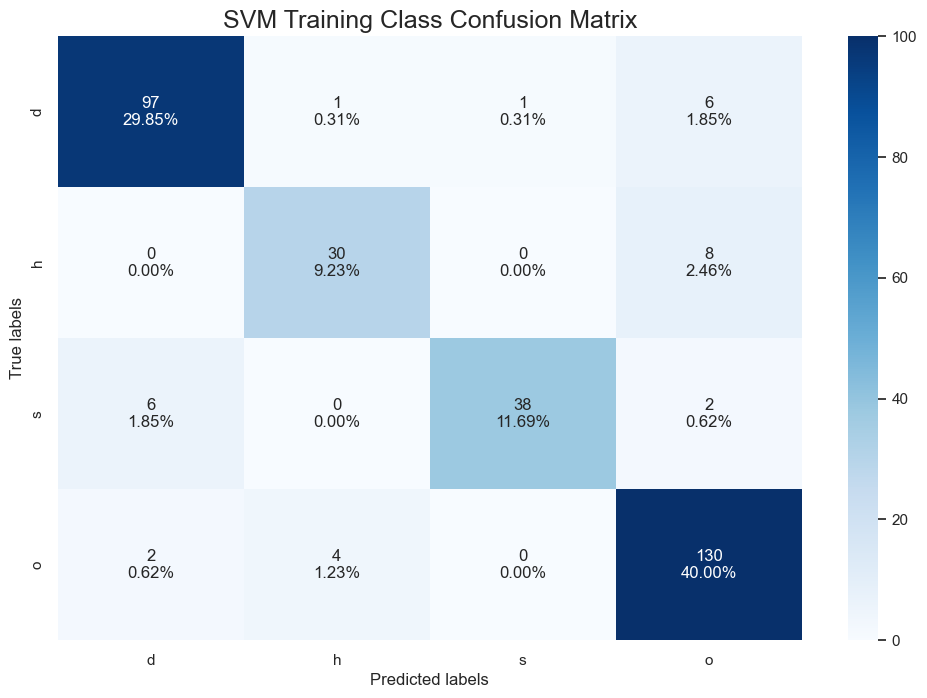

In [24]:
## Classification performance 
model_eval(svm_grid_search, X_train_scaled, Y_train, "SVM Training")


## 6. Repeat the above step using the Stochastic Gradient Descent Classifier from the SGDClassifier class.
> *As the one-versus-one computation is not implemented in SGDClassifier, you can use the default oneversus-all strategy for this classifier.*

<br/>

Stochastic Gradient Descent is simply an optimization technique that does not correspond to a family of machine learning models. It is a simple approach to efficiently fit linear classifiers and regressors under convex loss functions such as Support Vector Machines and Logistic Regression. 

The gradient of the loss function estimate for is computed over a series of samples with the goal of decreasing the loss at each step by the learning rate and updating the model parameters. By running in 'mini batches' the SGD method enables online/ out of core learning by partially fitting the data. This makes this method work well with very large datasets that cannot be loaded into memory. 


>
>The **advantages** of Stochastic Gradient Descent are:
>- Efficiency.
>- Ease of implementation (lots of opportunities for code tuning).
>
>The **disadvantages** of Stochastic Gradient Descent include:
>- SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
>- SGD is sensitive to feature scaling.<sup><a href="#4" >4</a></sup>


#### Hyperparameters Used & Considered

There are many hyperparameters that can be tuned for the Stochastic Gradient Descent classifier. The following variable have been fit using a cross validation grid search, the explanation of each has been taken from the documentation. 


>l1_ratiofloat, default=0.15
>- The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is ‘elasticnet’.
>
>alphafloat, default=0.0001
>- Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to learning_rate is set to ‘optimal’.
>
>learning_ratestr, default=’optimal’
>- The learning rate schedule:
>- ‘constant’: eta = eta0
>-‘optimal’: eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
>-‘invscaling’: eta = eta0 / pow(t, power_t)
>-‘adaptive’: eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.
>
>averagebool or int, default=False
>- When set to True, computes the averaged SGD weights across all updates and stores the result in the coef_ attribute. If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. So average=10 will begin averaging after seeing 10 samples.<sup><a href="#5" >5</a></sup>

### Process & Outcomes 

Best Hyperparameter Combinations: 
 - 'alpha': 0.01
 - 'average': True 
 - 'l1_ratio': 0.0

The best model has an accuracy of 86% when applied to the training set. The full classifications report is shown below. The classification looks to be doing quite well given the high precision, recall, f1 and accuracy scores. 

Training Classification Report: 
```
               precision    recall  f1-score   support

           d       0.86      0.87      0.86       105
           h       0.83      0.76      0.79        38
           o       0.97      0.70      0.81        46
           s       0.85      0.94      0.89       136

    accuracy                           0.86       325
   macro avg       0.88      0.82      0.84       325
weighted avg       0.87      0.86      0.86       325


```


### Stochastic Gradient Descent

Running the Stochastic Gradient Descent classifier using a random grid search with 3 fold cross validation. 

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

## Set up model 
sgd_clf = SGDClassifier(random_state=123)

## View hyperparameter 
sgd_clf.get_params().keys()

## Establish hyperparameter value grid 
param_grid = {
    "average": [True, False],
    "l1_ratio": [10, 1, 0.1, 0.01, 0.001], 
    "alpha": np.power(10, np.arange(-2, 1, dtype=float)),
}

## Establish the grid search 
sgd_grid_search = GridSearchCV( sgd_clf, 
                            param_grid, 
                            cv=3, 
                            verbose=3,
                            scoring="accuracy"
                        )
## Fit the data to the grid search 
sgd_grid_search.fit(X_train_scaled, Y_train)


dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV 1/3] END alpha=0.01, average=True, l1_ratio=10;, score=nan total time=   0.0s
[CV 2/3] END alpha=0.01, average=True, l1_ratio=10;, score=nan total time=   0.0s
[CV 3/3] END alpha=0.01, average=True, l1_ratio=10;, score=nan total time=   0.0s
[CV 1/3] END alpha=0.01, average=True, l1_ratio=1;, score=0.835 total time=   0.0s
[CV 2/3] END alpha=0.01, average=True, l1_ratio=1;, score=0.852 total time=   0.0s
[CV 3/3] END alpha=0.01, average=True, l1_ratio=1;, score=0.861 total time=   0.0s
[CV 1/3] END alpha=0.01, average=True, l1_ratio=0.1;, score=0.835 total time=   0.0s
[CV 2/3] END alpha=0.01, average=True, l1_ratio=0.1;, score=0.852 total time=   0.0s
[CV 3/3] END alpha=0.01, average=True, l1_ratio=0.1;, score=0.861 total time=   0.0s
[CV 1/3] END alpha=0.01, average=True, l1_ratio=0.01;, score=0.835 total time=   0.0s
[CV 2/3] END alpha=0.01, average=True, l1_ratio=0.01;, score=0.852 total time=   0.0s
[CV 3/3] END alph

C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\david\anaconda3\envs\cits5508-2022\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py",

GridSearchCV(cv=3, estimator=SGDClassifier(random_state=123),
             param_grid={'alpha': array([0.01, 0.1 , 1.  ]),
                         'average': [True, False],
                         'l1_ratio': [10, 1, 0.1, 0.01, 0.001]},
             scoring='accuracy', verbose=3)

### Hyperparameter Review & Best Model Extraction

Best Hyperparameter Combinations: 
 {'alpha': 0.01, 'average': False, 'l1_ratio': 1} 

Top Parameter Combinations: 


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_average,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.003335,4.729448e-04,0.000665,4.701344e-04,0.01,False,1,"{'alpha': 0.01, 'average': False, 'l1_ratio': 1}",0.834862,0.861111,0.851852,0.849275,0.01087,1
7,0.003332,4.712580e-04,0.000000,0.000000e+00,0.01,False,0.1,"{'alpha': 0.01, 'average': False, 'l1_ratio': ...",0.834862,0.861111,0.851852,0.849275,0.01087,1
8,0.002999,1.296163e-06,0.001001,1.744787e-06,0.01,False,0.01,"{'alpha': 0.01, 'average': False, 'l1_ratio': ...",0.834862,0.861111,0.851852,0.849275,0.01087,1
9,0.003000,7.867412e-07,0.001000,4.495664e-07,0.01,False,0.001,"{'alpha': 0.01, 'average': False, 'l1_ratio': ...",0.834862,0.861111,0.851852,0.849275,0.01087,1
1,0.003333,4.721575e-04,0.000667,4.714282e-04,0.01,True,1,"{'alpha': 0.01, 'average': True, 'l1_ratio': 1}",0.834862,0.851852,0.861111,0.849275,0.01087,5


Text(0.5, 0.98, 'Mean Test Score for Hyperparameter Value by Kernel Type')

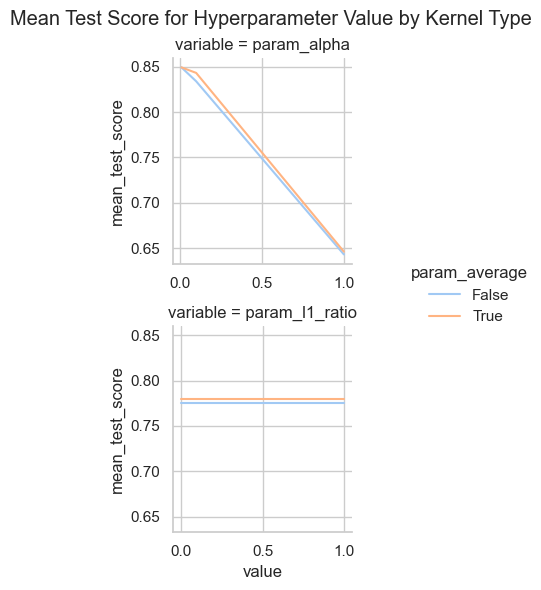

In [26]:
## Print best Parameters 
print("Best Hyperparameter Combinations: \n" , sgd_grid_search.best_params_ , "\n")

## Convert grid results to a data frame 
df = pd.DataFrame(sgd_grid_search.cv_results_)

## Print the top ranking combinations 
print("Top Parameter Combinations: ")
df.sort_values(by=['rank_test_score']).head()

## Convert data frame to long format for graphics 
vars = [ "param_alpha","param_average", "param_l1_ratio", "mean_test_score"]
df_long = df[vars].melt(id_vars=["param_average", "mean_test_score"])

## Create line plot for the variables 
g = sns.FacetGrid(df_long, row='variable', hue='param_average', sharex=False )
g = g.map(sns.lineplot, 'value', 'mean_test_score', ci=None).add_legend()

## Add title to the plot
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Mean Test Score for Hyperparameter Value by Kernel Type')


### Model Evaluation & Metrics 

SGD Training  Precision Score:  86.62%
SGD Training  Recall Score:  86.15%
SGD Training  F1 Score:  85.95%
SGD Training  Report: 
               precision    recall  f1-score   support

           d       0.86      0.87      0.86       105
           h       0.83      0.76      0.79        38
           o       0.97      0.70      0.81        46
           s       0.85      0.94      0.89       136

    accuracy                           0.86       325
   macro avg       0.88      0.82      0.84       325
weighted avg       0.87      0.86      0.86       325



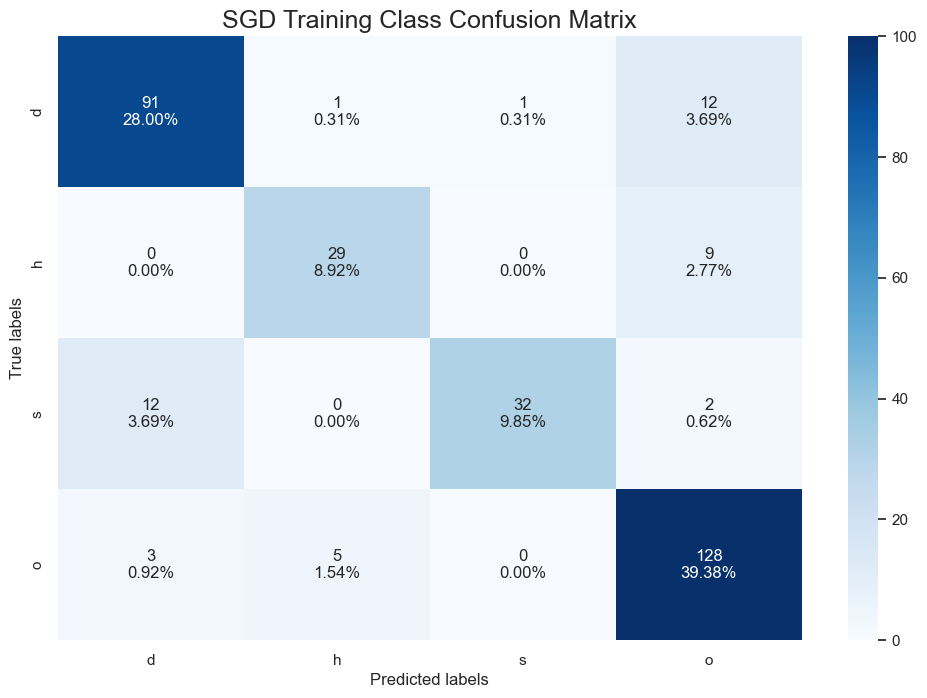

In [27]:
## Evaluate Model
model_eval(sgd_grid_search, X_train_scaled, Y_train, "SGD Training")

## 7. Compare the performances of the two classifiers and give a brief discussion about your experimental results.
> *You should show the confusion matrices and accuracies of the two classifiers for the testing set.*

The confusion matrix give insights into the areas where the model is having difficult between distinguishing between classes. Both models seem to be having difficulty classifying 'H' by classifying it as 'O'. This could be due to a lack of training data to properly define 'O' class as this only had 38 observations. 

The two models perform quite closely with regards to accuracy on the training data. The overall accuracy between the two models is relatively similar with the SVM at 84% and the SGD at 83%. 

The SVM however has higher precision, recall and F1 scores of 87%, 84%, 83% respectively, as opposed ot the SGD which had 86%, 82%, and 81%. However, the SVM had a large fall off in accuracy from 91% to 84% accuracy from the training to the testing dataset. This is evidence that the data has been overfit to the training set which may mean it wont generalize as well to new data. 

Given the higher metrics on the testing set across the categories, the best model is the SVM.

<br/>

---

<br/>

Note: the calculation of the individual scores for the model are based on the `weighted` method due to the imbalance of the classes within the dataset. This is described in the documentation as: 
> ``'weighted'``:
        Calculate metrics for each label, and find their average weighted
        by support (the number of true instances for each label). This
        alters 'macro' to account for label imbalance; it can result in an
        F-score that is not between precision and recall.

SVM Testing  Precision Score:  87.04%
SVM Testing  Recall Score:  84.34%
SVM Testing  F1 Score:  83.57%
SVM Testing  Report: 
               precision    recall  f1-score   support

           d       0.88      0.98      0.93        54
           h       0.96      0.54      0.69        48
           o       0.97      0.84      0.90        37
           s       0.72      0.97      0.83        59

    accuracy                           0.84       198
   macro avg       0.88      0.83      0.84       198
weighted avg       0.87      0.84      0.84       198

SGD Testing  Precision Score:  86.41%
SGD Testing  Recall Score:  83.33%
SGD Testing  F1 Score:  82.38%
SGD Testing  Report: 
               precision    recall  f1-score   support

           d       0.87      0.98      0.92        54
           h       0.96      0.52      0.68        48
           o       0.97      0.78      0.87        37
           s       0.72      0.98      0.83        59

    accuracy                           

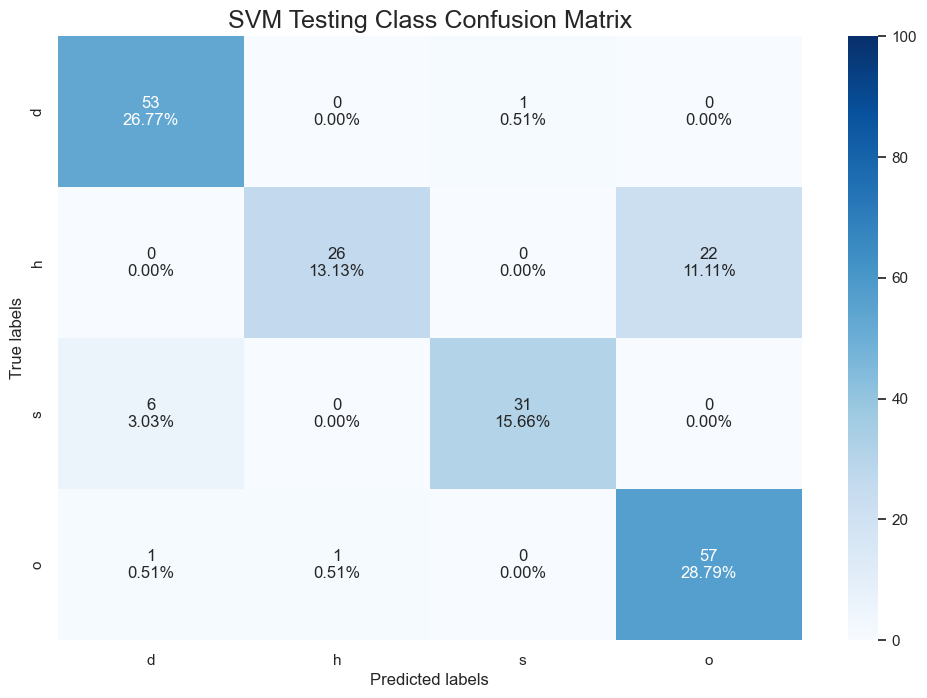

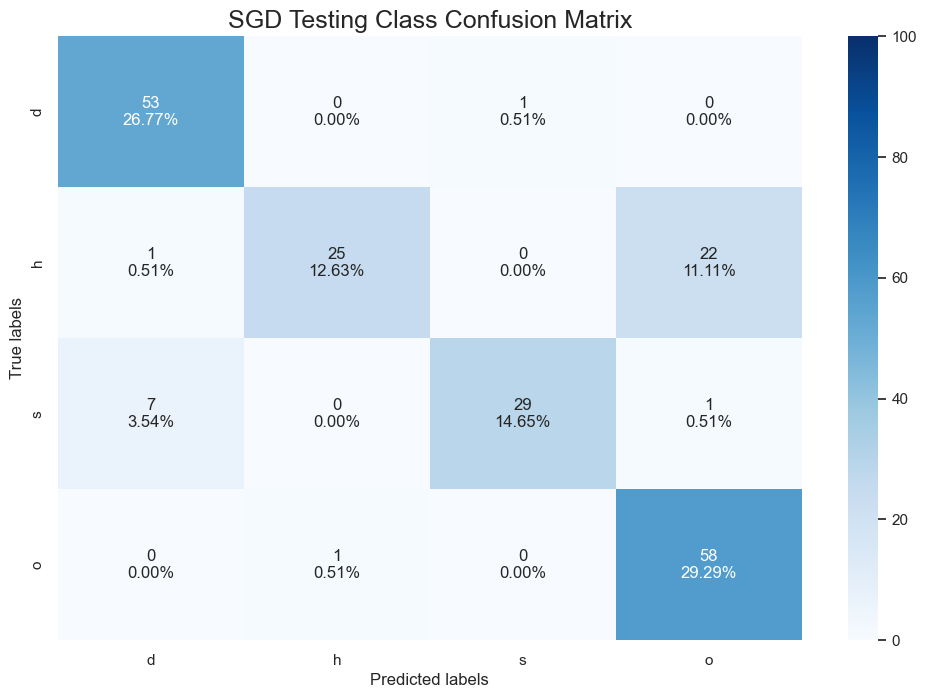

In [28]:
from sklearn.metrics import recall_score, precision_score, f1_score

## Evaluate Models
model_eval(svm_grid_search, X_test_scaled, Y_test, "SVM Testing")
model_eval(sgd_grid_search, X_test_scaled, Y_test, "SGD Testing")


# Notes: 

Total runtime on my machine: 45 sec

<div>
0. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
</div>

<br/>

<div id="1">
1. Johnson, B., Tateishi, R., Xie, Z., 2012. Using geographically-weighted variables for image classification. Remote Sensing Letters, 3 (6), 491-499.
<br/>
Website: <a href="http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping#">UCI Machine Learning Repository, Center for Machine Learning and Intelligent Systems.</a>
</div>

<br/>

<div id=2>
2. Support Vector Machines
Website: <a href="https://scikit-learn.org/stable/modules/svm.html">https://scikit-learn.org/stable/modules/svm.html</a>
</div>
<br/>

<div id=3>
3. SVM Documentation 
Website: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC">https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC</a>
</div>
<br/>


<div id=4>
4. Stochastic Gradient Descent
Website: <a href="https://scikit-learn.org/stable/modules/sgd.html">https://scikit-learn.org/stable/modules/sgd.html</a>
</div>
<br/>

<div id=5>
5. SVM Classifier Documentation 
Website: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html</a>
</div>
